As always starting the same, importing the data from my trusty function.

In [36]:
import kaggle
import zipfile
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, kruskal, norm, probplot
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

## function to load and display main dataset information
def load(path, info=True):
    
    ## checks the type of the dataset
    if path.endswith('.csv'):
        read = pd.read_csv(path)
    elif path.endswith('.xlsx'):
        read = pd.read_excel(path)
        
    ## main information about a dataset
    if info:
        if len(read) > 0:
            print("# Data imported!")
            print("# ------------------------------------", "\n")
        
            print("# DIMENSIONS Q-------------------------")
            print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")
            # shows which columns have what data types
            print("# DTYPES -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("object").columns), "\n", 
                      read.select_dtypes("object").columns.tolist(), "\n")
    
            if len(read.select_dtypes("integer").columns) > 0:
                print("Integer Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("integer").columns), "\n", 
                      read.select_dtypes("integer").columns.tolist(), "\n")
    
            if len(read.select_dtypes("float").columns) > 0:
                print("Float Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("float").columns), "\n", 
                      read.select_dtypes("float").columns.tolist(), "\n")
    
            if len(read.select_dtypes("bool").columns) > 0:
                print("Bool Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("bool").columns), "\n", 
                      read.select_dtypes("bool").columns.tolist(), "\n")
    
            print("# MISSING VALUE ---------------------")
            print("Are there any missing values? \n ", np.where(read.isnull().values.any() == False, 
                                                                "No missing value!", "Data includes missing value!"), "\n")
            
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# MEMORY USAGE ---------------------- \n", info)
          
        else:
            print("# Data did not import!")
    
    return read

## Importing the data
## Extracting file from zip
zip_refer = zipfile.ZipFile('marketing.zip')

## Extracting file to dir
zip_refer.extractall()

## Closing the zip file
zip_refer.close()

## Get the csv file
path = 'WA_Marketing-Campaign.csv'
data = load(path, info=True)

## Displaying the first few rows of the dataframe
print(data.head(10))


# Data imported!
# ------------------------------------ 

# DIMENSIONS Q-------------------------
Observation: 548 Column: 7 

# DTYPES -----------------------------
Object Variables: 
 # of Variables: 1 
 ['MarketSize'] 

Integer Variables: 
 # of Variables: 5 
 ['MarketID', 'LocationID', 'AgeOfStore', 'Promotion', 'week'] 

Float Variables: 
 # of Variables: 1 
 ['SalesInThousands'] 

# MISSING VALUE ---------------------
Are there any missing values? 
  No missing value! 

# MEMORY USAGE ---------------------- 
 30.1+ KB
   MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0         1     Medium           1           4          3     1   
1         1     Medium           1           4          3     2   
2         1     Medium           1           4          3     3   
3         1     Medium           1           4          3     4   
4         1     Medium           2           5          2     1   
5         1     Medium           2           5          2     2   
6

         MarketID  LocationID  AgeOfStore   Promotion        week  \
count  548.000000  548.000000  548.000000  548.000000  548.000000   
mean     5.715328  479.656934    8.503650    2.029197    2.500000   
std      2.877001  287.973679    6.638345    0.810729    1.119055   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000  216.000000    4.000000    1.000000    1.750000   
50%      6.000000  504.000000    7.000000    2.000000    2.500000   
75%      8.000000  708.000000   12.000000    3.000000    3.250000   
max     10.000000  920.000000   28.000000    3.000000    4.000000   

       SalesInThousands  
count        548.000000  
mean          53.466204  
std           16.755216  
min           17.340000  
25%           42.545000  
50%           50.200000  
75%           60.477500  
max           99.650000  


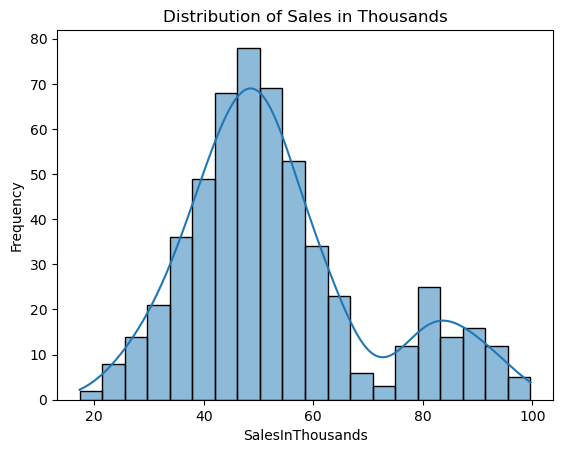

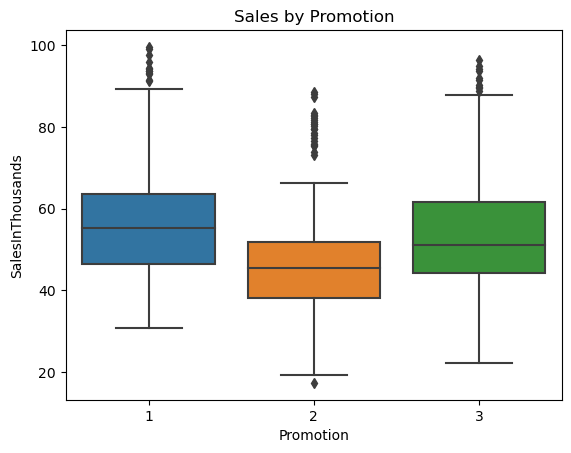

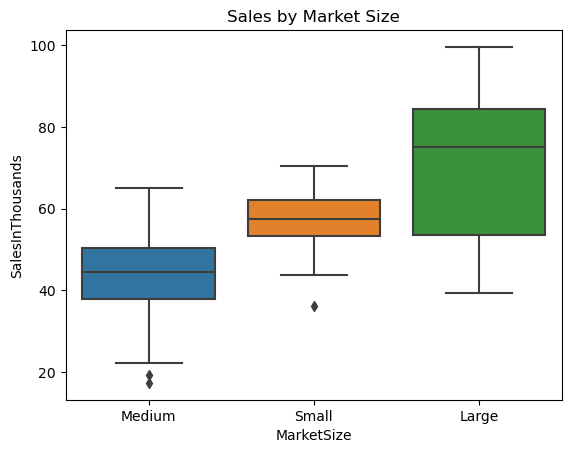

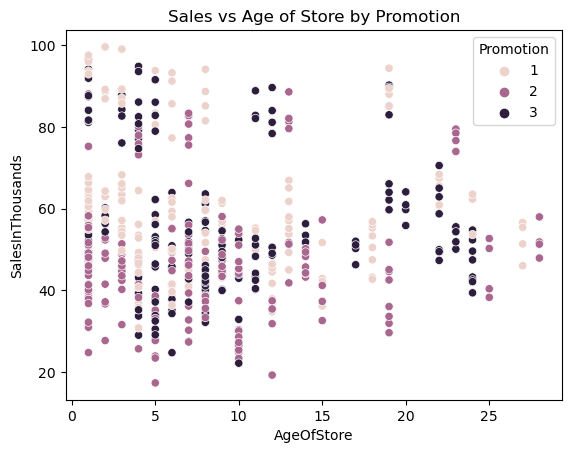

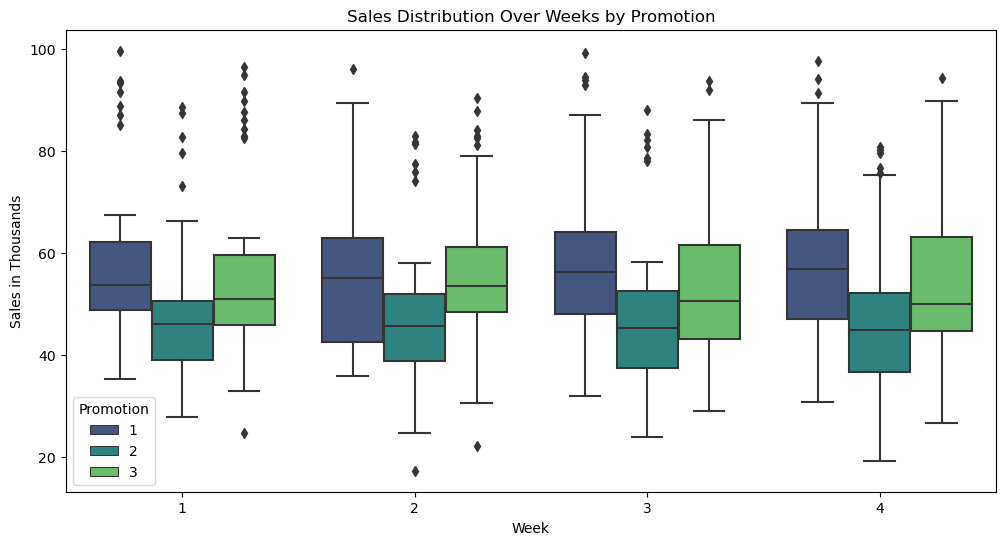

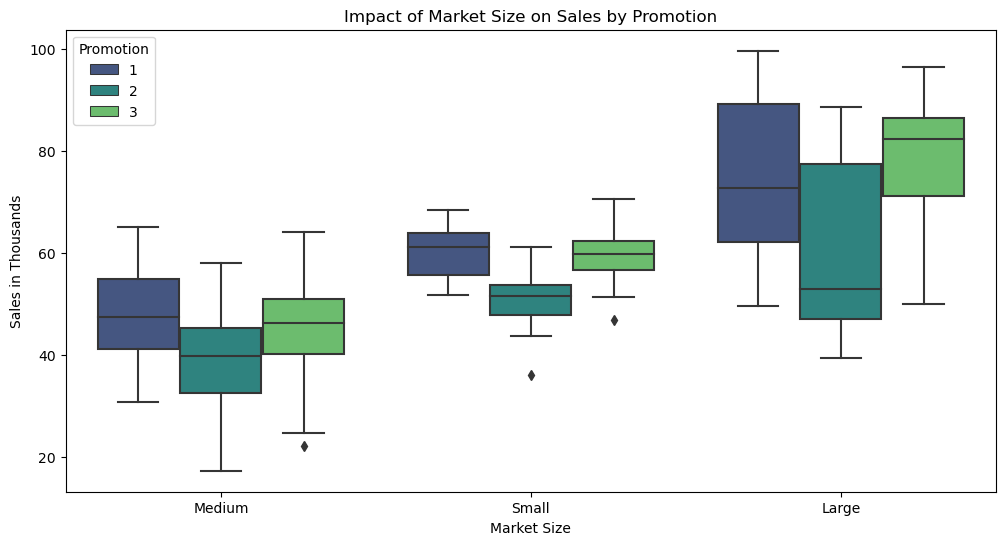

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

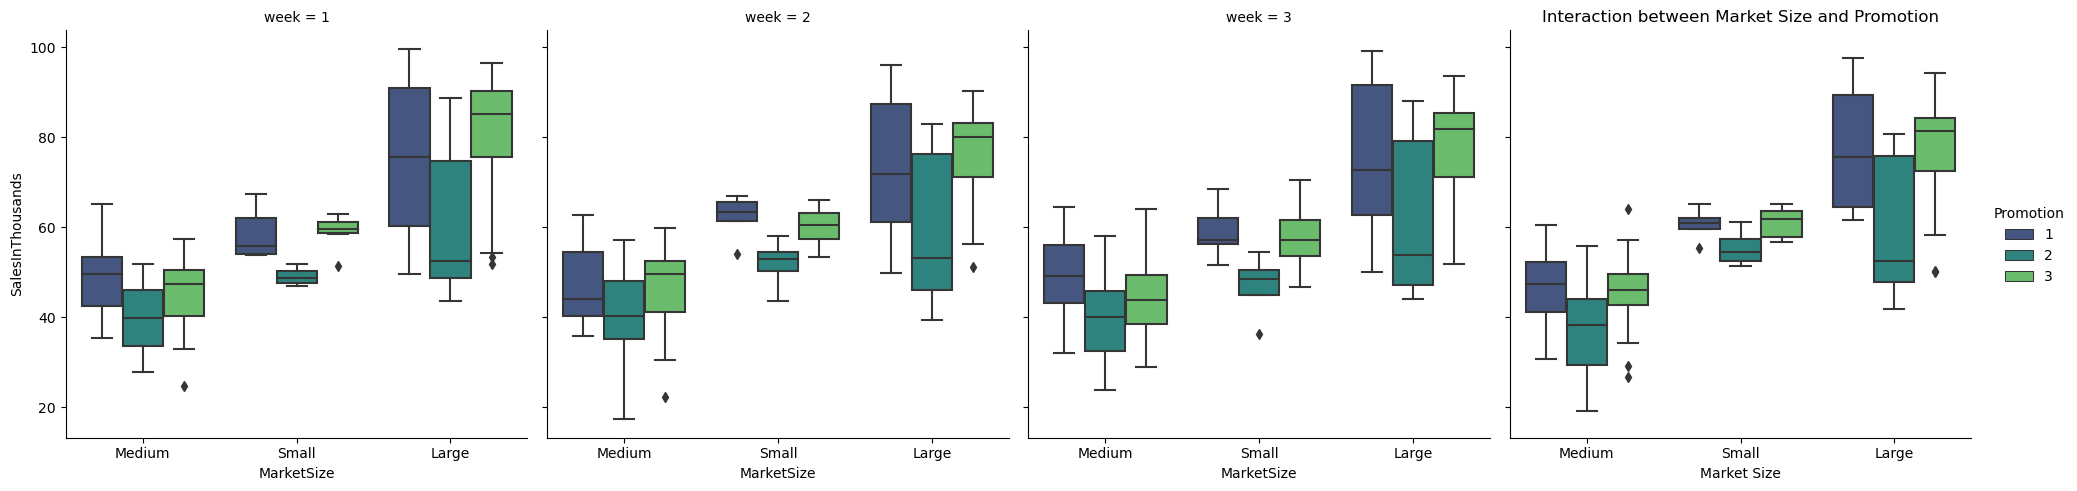

In [18]:
# Summary statistics
print(data.describe())

# Visualizing the dist. of Sales
sns.histplot(data['SalesInThousands'], bins=20, kde=True)
plt.title('Distribution of Sales in Thousands')
plt.xlabel('SalesInThousands')
plt.ylabel('Frequency')
plt.show()

# Box plot of Sales by Promotion
sns.boxplot(x='Promotion', y='SalesInThousands', data=data)
plt.title('Sales by Promotion')
plt.xlabel('Promotion')
plt.ylabel('SalesInThousands')
plt.show()

# Box plot of Sales by MarketSize
sns.boxplot(x='MarketSize', y='SalesInThousands', data=data)
plt.title('Sales by Market Size')
plt.xlabel('MarketSize')
plt.ylabel('SalesInThousands')
plt.show()

# Scatter plot of Sales vs AgeOfStore
sns.scatterplot(x='AgeOfStore', y='SalesInThousands', hue='Promotion', data=data)
plt.title('Sales vs Age of Store by Promotion')
plt.xlabel('AgeOfStore')
plt.ylabel('SalesInThousands')
plt.show()

# Dist of sales over weeks
plt.figure(figsize=(12, 6))
sns.boxplot(x='week', y='SalesInThousands', hue='Promotion', data=data, palette='viridis')
plt.xlabel('Week')
plt.ylabel('Sales in Thousands')
plt.title('Sales Distribution Over Weeks by Promotion')
plt.legend(title='Promotion')
plt.show()

# Impact of market size on sales by promotion
plt.figure(figsize=(12, 6))
sns.boxplot(x='MarketSize', y='SalesInThousands', hue='Promotion', data=data, palette='viridis')
plt.xlabel('Market Size')
plt.ylabel('Sales in Thousands')
plt.title('Impact of Market Size on Sales by Promotion')
plt.legend(title='Promotion')
plt.show()

# Interaction between market size and promotion
plt.figure(figsize=(12, 6))
sns.catplot(x='MarketSize', y='SalesInThousands', hue='Promotion', col='week', data=data, kind='box', palette='viridis')
plt.xlabel('Market Size')
plt.ylabel('Sales in Thousands')
plt.title('Interaction between Market Size and Promotion')
plt.show()


We perfrom EDA to get know more of this dataset.

The distribution of sales is approximately normal, with a peak around 50-60 thousand sales. There are some outliers with higher sales, but the majority of sales are centered around the mean.

Promotion 2 has the lowest median sales compared to Promotions 1 and 3. Promotion 1 shows a slightly higher median but a smaller range of sales. Promotion 3 has lower median but higher range thus, while the median results can be smaller than in the 1st promotion but the range is bigger.

Large markets have the highest median sales, followed by small markets, and medium markets have the lowest median sales. This indicates that market size significantly impacts sales, with larger markets generating higher sales.\

There is no clear trend between the age of the store and sales. Sales are fairly distributed across stores of different ages, with no significant impact of store age on sales.Maybe there are some less sales happening on the older stores but right now i can not conclude that it is significant.

Sales distribution varies over the weeks for different promotions. Promotion 2 consistently shows lower median sales across all weeks, while Promotion 3 shows higher variability but lower median sales (than promotion 1), especially in later weeks.

Large markets have the highest sales across all promotions, followed by small and medium markets. Promotion 2 performs poorly across all market sizes, while Promotion 3 performs well, especially in large markets.

There is a noticeable interaction between market size and promotion effectiveness. Large markets generally show higher sales, with Promotion 3 performing better in these markets. Medium markets show the least sales, and Promotion 2 performs poorly across all market sizes and weeks.

Checking for assumptions for anova. 

In [11]:
# Checking for normality using Shapiro Wilk test
promotions = data['Promotion'].unique()
normality_results = {}

for promotion in promotions:
    sales_data = data[data['Promotion'] == promotion]['SalesInThousands']
    stat, p_value = shapiro(sales_data)
    normality_results[promotion] = (stat, p_value)

print("Shapiro-Wilk Test Results for Normality:")
for promo, result in normality_results.items():
    print(f"Promotion {promo}: Statistics={result[0]}, p-value={result[1]}")

# Checking for homogeneity of variance using Levene's test, other assumptions hold
stat, p_value = levene(
    data[data['Promotion'] == 1]['SalesInThousands'],
    data[data['Promotion'] == 2]['SalesInThousands'],
    data[data['Promotion'] == 3]['SalesInThousands']
)
print(f"Levene's Test for Homogeneity of Variance: Statistics={stat}, p-value={p_value}")


Shapiro-Wilk Test Results for Normality:
Promotion 3: Statistics=0.9207685589790344, p-value=1.499518376135711e-08
Promotion 2: Statistics=0.9145088195800781, p-value=5.456247009760773e-09
Promotion 1: Statistics=0.9152998328208923, p-value=1.9772498305314912e-08
Levene's Test for Homogeneity of Variance: Statistics=1.2696787527507418, p-value=0.2817514565692118


This was clear from the earlier graph but the data is not normal as p-value for all of the promotions are <0.05, thus we can not perform anova test. But Levene's test for homogeneity of variance returned >0.05 thus, variances across promotions are equal and this assumption is met. A couple of ways to proceed: try transofrmming the data with log, sqrt or normalizing it, but i doubt it will help in this situation. Thus, we try something new for me:Kruskal-Wallis test, a non-parametric alternative to ANOVA that does not assume normality.


H0:There is no significant difference in sales between the different promotions.
H1:There is a significant difference in sales between the different promotions.

In [14]:

# Performing Kruskal-Wallis test
stat, p_value = kruskal(
    data[data['Promotion'] == 1]['SalesInThousands'],
    data[data['Promotion'] == 2]['SalesInThousands'],
    data[data['Promotion'] == 3]['SalesInThousands']
)
print(f"Kruskal-Wallis Test: Statistics={stat}, p-value={p_value}")


Kruskal-Wallis Test: Statistics=53.29475169322799, p-value=2.6741866266697816e-12


Since the p-value is much less than 0.05, we reject the null hypothesis. This means that there is a statistically significant difference in sales distributions between at least two of the promotion groups. We now try to perform post-hoc analysis, as well as finding out the scale for these differences.

In [43]:

# Pairwise comparisons using Mann Whitney U test with Bonferroni correction
promotions = data['Promotion'].unique()
pairwise_results = {}
bonferroni_correction = 0.05 / 3  

for i in range(len(promotions)):
    for j in range(i + 1, len(promotions)):
        group1 = data[data['Promotion'] == promotions[i]]['SalesInThousands']
        group2 = data[data['Promotion'] == promotions[j]]['SalesInThousands']
        stat, p_value = mannwhitneyu(group1, group2)
        pairwise_results[(promotions[i], promotions[j])] = (stat, p_value, p_value < bonferroni_correction)

print("Pairwise Mann-Whitney U Test Results:")
for groups, result in pairwise_results.items():
    print(f"Promotion {groups[0]} vs Promotion {groups[1]}: Statistics={result[0]}, p-value={result[1]}, Significant={result[2]}")


Pairwise Mann-Whitney U Test Results:
Promotion 3 vs Promotion 2: Statistics=23251.0, p-value=1.1970084441651803e-07, Significant=True
Promotion 3 vs Promotion 1: Statistics=14089.0, p-value=0.035084095693231204, Significant=False
Promotion 2 vs Promotion 1: Statistics=9378.5, p-value=5.845935246838518e-12, Significant=True


We see a significant difference between 3 vs 2 promotions as well 2 vs 1 promotions. While 3 vs 1 promotions the difference is insignificant. Now we move on to calculate the effect sizes of these promotions.

In [16]:

# Calculating rank biserial corr as an effect size
def rank_biserial_correlation(group1, group2):
    u_statistic, _ = mannwhitneyu(group1, group2)
    n1 = len(group1)
    n2 = len(group2)
    rank_biserial = (2 * u_statistic) / (n1 * n2) - 1
    return rank_biserial

effect_sizes = {}
for i in range(len(promotions)):
    for j in range(i + 1, len(promotions)):
        group1 = data[data['Promotion'] == promotions[i]]['SalesInThousands']
        group2 = data[data['Promotion'] == promotions[j]]['SalesInThousands']
        effect_size = rank_biserial_correlation(group1, group2)
        effect_sizes[(promotions[i], promotions[j])] = effect_size

print("Effect Sizes (Rank-Biserial Correlation):")
for groups, size in effect_sizes.items():
    print(f"Promotion {groups[0]} vs Promotion {groups[1]}: Effect Size={size}")


Effect Sizes (Rank-Biserial Correlation):
Promotion 3 vs Promotion 2: Effect Size=0.3156971480307831
Promotion 3 vs Promotion 1: Effect Size=-0.1285873330034636
Promotion 2 vs Promotion 1: Effect Size=-0.4199344383968332


The rank-biserial correlation is approximately 0.316, suggesting a moderate positive effect of Promotion 3 over Promotion 2
The rank-biserial correlation is approximately -0.129, indicating a small negative effect of Promotion 3 compared to Promotion 1, but not statistically significant.
The rank-biserial correlation is approximately -0.420, suggesting a strong negative effect of Promotion 2 compared to Promotion 1.
Now lets see does market size have a significant difference:

In [19]:

# Kruskal-Wallis test for Market Size impact
kruskal_market = stats.kruskal(
    data[data['MarketSize'] == 'Small']['SalesInThousands'],
    data[data['MarketSize'] == 'Medium']['SalesInThousands'],
    data[data['MarketSize'] == 'Large']['SalesInThousands']
)
print(f"Kruskal-Wallis Test for Market Size: Statistics={kruskal_market.statistic}, p-value={kruskal_market.pvalue}")


Kruskal-Wallis Test for Market Size: Statistics=256.4394987248011, p-value=2.064763816439178e-56


Since the p-value is much less than 0.05, we reject the null hypothesis. This indicates that there are statistically significant differences in sales distributions across the different market sizes. This suggests that the market size has a significant impact on sales.

In [20]:
# Bootstrap median calculations, alpha 0.05
def bootstrap_median(data, n_iterations=1000, ci=95):
    medians = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(sample))
    lower_bound = np.percentile(medians, (100 - ci) / 2)
    upper_bound = np.percentile(medians, 100 - (100 - ci) / 2)
    return lower_bound, upper_bound

# Bootstrap confidence intervals for each promotion
for promo in data['Promotion'].unique():
    promo_data = data[data['Promotion'] == promo]['SalesInThousands']
    lower, upper = bootstrap_median(promo_data)
    print(f"Promotion {promo}: Median Sales 95% CI [{lower}, {upper}]")


Promotion 3: Median Sales 95% CI [49.978375, 52.93025]
Promotion 2: Median Sales 95% CI [44.16, 47.345]
Promotion 1: Median Sales 95% CI [53.52975, 57.15050000000001]


Promotion 1 has the highest median sales with a 95% confidence interval ranging from approximately 53.53 to 57.15. Promotion 3 follows with a median sales interval from approximately 49.98 to 52.93. Promotion 2 has the lowest median sales interval from approximately 44.16 to 47.35. This further supports the conclusion that Promotion 1 performs the best in terms of sales, while Promotion 2 performs the worst.